<a href="https://colab.research.google.com/github/WittyFrost/trails/blob/master/Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Statistical Machine Learning 2025 - Rupam Singh

# **Exercise:5:**  **Decision Tree (Week 5)**

>You play golf every Sunday and you invite your best friend, Arthur to come with you every time. Arthur sometimes comes to join but sometimes not. For him, it depends on a number of factors for example, **Weather**, **Temperature**, **Humidity** and **Wind**. We'll use the dataset of last two week to predict whether or not Arthur will join you to play golf. An intuitive way to do this is through a Decision Tree.

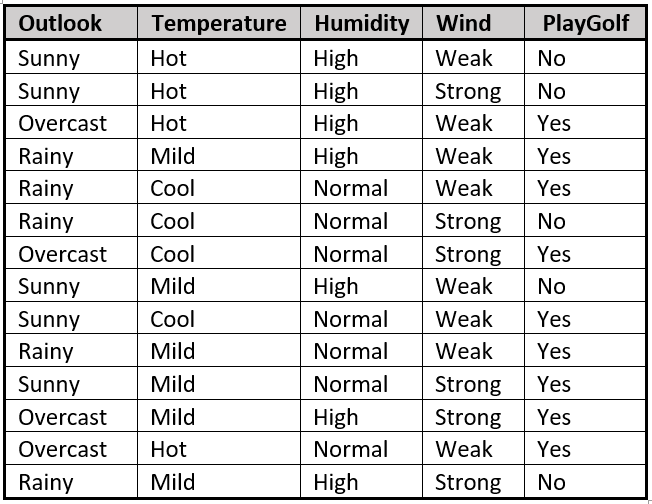

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SocialSet.xlsx to SocialSet.xlsx


These lines import the files module from the google.colab package. Then, they prompt the user to upload files, storing the uploaded files in the variable uploaded.

## Building a Decision Tree

In [ ]:
import pandas as pd

df = pd.read_excel("SocialSet.xlsx")
print("\n SocialSet Dataset:\n\n", df)


 SocialSet Dataset:

    length_name  default_name  follower_follow_rate  info_complete  urank  \
0           10             0              0.018538              1      8   
1            6             0              0.923773              2     23   
2            5             0              0.404858              2     20   
3            5             0              0.058024              1      6   
4            4             0              0.996521              2     48   
5            7             0              0.386423              2     44   
6            6             0              0.020247              2      4   
7            7             0              0.251244              2     29   
8            5             0              0.183793              1     20   

       D  
0  10.00  
1   6.00  
2   5.00  
3   6.25  
4   4.00  
5   7.00  
6   6.00  
7   7.00  
8   5.00  


These lines import the pandas library and alias it as pd. Then, they read a CSV file named "playgolf_data.csv" into a DataFrame df. Finally, they print out the content of the DataFrame df, displaying the given play golf dataset.

### Predicting Attributes

In [ ]:
t = df.keys()[-3]
print('Target Attribute is   ➡ ', t)

# Get the attribute names from input dataset
attribute_names = list(df.keys())
#Remove the target attribute from the attribute names list
attribute_names.remove(t)
print('Predicting Attributes ➡ ', attribute_names)

Target Attribute is   ➡  info_complete
Predicting Attributes ➡  ['length_name', 'default_name', 'follower_follow_rate', 'urank', 'D']


*   **t = df.keys()[-1]:** This line retrieves the last key (column name) from the DataFrame df using df.keys(). In Python, when you use negative indexing ([-1]), it starts counting from the end of the list. So, this line is assigning the last column name (key) to the variable t.

*   **attribute_names = list(df.keys()):** Here, list(df.keys()) returns a list of all the column names (keys) in the DataFrame df, and this list is assigned to the variable attribute_names.

*   **attribute_names.remove(t):** This line removes the target attribute (stored in the variable t) from the list of attribute names stored in attribute_names. This operation ensures that the target attribute is excluded from the list of attributes used for prediction.

### Entropy of the Training Data Set

In [ ]:
#Function to calculate the entropy of probability of observations
# -p*log2*p
from collections import Counter
import math
def entropy(probs):
    return sum( [-prob*math.log(prob, 2) for prob in probs])

#Function to calulate the entropy of the given Datasets/List with respect to target attributes
def entropy_of_list(ls,value):

    total_instances = len(ls)  # = 14
    print("---------------------------------------------------------")
    print("\nTotal no of instances/records associated with '{0}' is ➡ {1}".format(value,total_instances))
    # Counter calculates the propotion of class
    cnt = Counter(x for x in ls)
    print('\nTarget attribute class count(Yes/No)=',dict(cnt))

    # x means no of YES/NO
    probs = [x / total_instances for x in cnt.values()]
    print("\nClasses➡", max(cnt), min(cnt))
    print("\nProbabilities of Class 'p'='{0}' ➡ {1}".format(max(cnt),max(probs)))
    print("Probabilities of Class 'n'='{0}'  ➡ {1}".format(min(cnt),min(probs)))

    # Call Entropy
    entropy_value = entropy(probs)
    print("Entropy:", entropy_value)
    return entropy(probs)


*   **import math:** This imports the math module in Python, which provides mathematical functions like logarithm.

*   **def entropy(probs):** This line defines a function named entropy which takes a list of probabilities (probs) as input.

*   **return sum( [-prob*math.log(prob, 2) for prob in probs]):** This line calculates the entropy using a list comprehension to iterate over each probability in probs, calculating -prob * math.log(prob, 2) for each probability. Then, it sums up all these values and returns the result.

*   **def entropy_of_list(ls,value):** This line defines another function named entropy_of_list which takes two arguments: a list (ls) and a value (value).

*   **from collections import Counter:** This imports the Counter class from the collections module. Counter is a dictionary subclass for counting hashable objects.

*   **total_instances = len(ls):** This calculates the total number of instances in the list ls and assigns it to the variable total_instances.

*   **cnt = Counter(x for x in ls):** This creates a Counter object cnt which counts the occurrences of each element in the list ls.

*   **probs = [x / total_instances for x in cnt.values()]:** This calculates the probability of each class by dividing the count of each class by the total number of instances.

*   **return entropy(probs):** This calls the entropy() function with the list of probabilities probs and returns the calculated entropy.

### Information Gain of Attributes

In [ ]:
def information_gain(df, split_attribute, target_attribute,battr):
    print("\n\n----- Information Gain Calculation of",split_attribute,"----- ")

    # group the data based on attribute values
    df_split = df.groupby(split_attribute)
    glist=[]
    for gname,group in df_split:
        print('Grouped Attribute Values \n',group)
        print("---------------------------------------------------------")
        glist.append(gname)

    glist.reverse()
    nobs = len(df.index) * 1.0
    df_agg1=df_split.agg({target_attribute:lambda x:entropy_of_list(x, glist.pop())})
    df_agg2=df_split.agg({target_attribute :lambda x:len(x)/nobs})

    df_agg1.columns=['Entropy']
    df_agg2.columns=['Proportion']

    # Calculate Information Gain:
    new_entropy = sum( df_agg1['Entropy'] * df_agg2['Proportion'])
    if battr !='S':
        old_entropy = entropy_of_list(df[target_attribute],'S-'+df.iloc[0][df.columns.get_loc(battr)])
    else:
        old_entropy = entropy_of_list(df[target_attribute],battr)
    return old_entropy - new_entropy

> *   **def information_gain(df, split_attribute, target_attribute, battr):** This line defines a function named information_gain that takes four arguments:
1.   ***df:*** The DataFrame containing the dataset.
2.   ***split_attribute:*** The attribute based on which the dataset will be split.
3.   ***target_attribute:*** The attribute whose entropy is to be calculated.
4.   ***battr:*** The best attribute selected so far in the decision tree construction process.

*   **df_split = df.groupby(split_attribute):** This line groups the DataFrame df by the values of the split_attribute.
*   **glist=[]:** This line initializes an empty list named glist which will store the unique values of the split attribute.
*   **for gname, group in df_split:** This line iterates through each group created by the split attribute.
*   **glist.append(gname):** This line appends the current group name (i.e., the value of the split attribute for the current group) to the glist list.
*   **glist.reverse():** This line reverses the order of elements in the glist list.
*   **nobs = len(df.index) * 1.0:** This line calculates the total number of observations (rows) in the DataFrame.
*   **df_agg1 = df_split.agg({target_attribute: lambda x: entropy_of_list(x, glist.pop())}):** This line calculates the entropy of the target_attribute for each group and stores the results in a DataFrame named df_agg1.
*   **df_agg2 = df_split.agg({target_attribute: lambda x: len(x)/nobs}):** This line calculates the proportion of observations for each group and stores the results in a DataFrame named df_agg2.
*   **df_agg1.columns = ['Entropy'] and df_agg2.columns = ['Proportion']:** These lines rename the columns of the DataFrames df_agg1 and df_agg2 to 'Entropy' and 'Proportion' respectively.
*   **new_entropy = sum(df_agg1['Entropy'] * df_agg2['Proportion']):** This line calculates the new entropy after the split by summing the product of each group's entropy and its proportion.
*   **if battr != 'S':** This line checks if the best attribute selected so far (battr) is not equal to 'S'.
*   **old_entropy = entropy_of_list(df[target_attribute], 'S-' + df.iloc[0][df.columns.get_loc(battr)]) and old_entropy = entropy_of_list(df[target_attribute], battr):** These lines calculate the entropy of the target attribute before the split based on the best attribute selected so far. If battr is not equal to 'S', it prefixes 'S-' to the value of the best attribute for entropy calculation.
*   **return old_entropy - new_entropy:** This line returns the information gain, which is calculated as the difference between the old entropy and the new entropy.

### ID3 Algorithm

In [ ]:
def id3(df, target_attribute, attribute_names, default_class=None,default_attr='S'):

    from collections import Counter
    cnt = Counter(x for x in df[target_attribute])# class of YES /NO

    ## First check: Is this split of the dataset homogeneous?
    if len(cnt) == 1:
        return next(iter(cnt))  # next input data set, or raises StopIteration when EOF is hit.

    ## Second check: Is this split of the dataset empty? if yes, return a default value
    elif df.empty or (not attribute_names):
        return default_class  # Return None for Empty Data Set

    ## Otherwise: This dataset is ready to be devied up!
    else:
        # Get Default Value for next recursive call of this function:
        default_class = max(cnt.keys()) #No of YES and NO Class
        # Compute the Information Gain of the attributes:
        gainz=[]
        for attr in attribute_names:
            ig= information_gain(df, attr, target_attribute,default_attr)
            gainz.append(ig)
            print('\nInformation gain of','“',attr,'”','is ➡', ig)
            print("=========================================================")

        index_of_max = gainz.index(max(gainz))               # Index of Best Attribute
        best_attr = attribute_names[index_of_max]            # Choose Best Attribute to split on
        print("\nList of Gain for arrtibutes:",attribute_names,"\nare:", gainz,"respectively.")
        print("\nAttribute with the maximum gain is ➡", best_attr)
        print("\nHence, the Root node will be ➡", best_attr)
        print("=========================================================")

        # Create an empty tree, to be populated in a moment
        tree = {best_attr:{}} # Initiate the tree with best attribute as a node
        remaining_attribute_names =[i for i in attribute_names if i != best_attr]

        # Split dataset-On each split, recursively call this algorithm.Populate the empty tree with subtrees, which
        # are the result of the recursive call
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,target_attribute, remaining_attribute_names,default_class,best_attr)
            tree[best_attr][attr_val] = subtree
        return tree

> *   **def id3(df, target_attribute, attribute_names, default_class=None,
default_attr='S'):** This line defines a Python function named id3 which takes five arguments:
1.   **df:** The dataset to be used for decision tree construction.
2.   **target_attribute:** The name of the target attribute or the class label.
3.   **attribute_names:** A list of attribute names (features) in the dataset.
4.   **default_class:** The default class label to return if the dataset is empty.
5.   **default_attr:** The default attribute value.
*   **from collections import Counter:** This line imports the Counter class from the collections module. Counter is used to count occurrences of elements in a collection.
*   **cnt = Counter(x for x in df[target_attribute]):** This line creates a Counter object called cnt that counts the occurrences of each class label in the target attribute column of the dataset.
*   **if len(cnt) == 1:** This line checks if there is only one unique class label in the dataset.
*   **return next(iter(cnt)):** If there is only one unique class label, this line returns that label. iter() creates an iterator from the Counter object, and next() returns the next element of the iterator.
*   **elif df.empty or (not attribute_names):** This line checks if the dataset is empty or if there are no attributes left to split on.
*   **return default_class:** If the dataset is empty or there are no attributes left, this line returns the default class label.
*   **else:** If none of the above conditions are met, this line signifies that the dataset is ready to be split.
*   **default_class = max(cnt.keys()):** This line sets the default class label to the class label with the maximum count in the dataset.
*   **gainz=[]:** This line initializes an empty list to store information gain values for each attribute.
*   **for attr in attribute_names:** This line starts a loop over each attribute in the list of attribute names.
*   **ig= information_gain(df, attr, target_attribute,default_attr):** This line calculates the information gain for the current attribute using a function called information_gain.
*   **gainz.append(ig):** This line appends the calculated information gain to the gainz list.
*   **index_of_max = gainz.index(max(gainz)):** This line finds the index of the maximum information gain in the gainz list.
*   **best_attr = attribute_names[index_of_max]:** This line selects the attribute with the highest information gain as the best attribute to split on.
*   **tree = {best_attr:{}}:** This line initializes an empty dictionary representing the decision tree, with the best attribute as the root node.
*   **remaining_attribute_names =[i for i in attribute_names if i != best_attr]:** This line creates a list of remaining attributes after removing the best attribute.
*   **for attr_val, data_subset in df.groupby(best_attr):** This line iterates over each unique value of the best attribute and its corresponding subset of the dataset.
*   **subtree = id3(data_subset,target_attribute, remaining_attribute_names,default_class,best_attr):** This line recursively calls the id3 function to build subtrees for each branch of the decision tree.
*   **tree[best_attr][attr_val] = subtree:** This line adds the subtree to the decision tree dictionary under the appropriate branch.
*   **return tree:** This line returns the constructed decision tree.

### Tree formation

In [ ]:
#Function to calulate the entropy of the given Dataset with respect to target attributes
def entropy_dataset(a_list):
    from collections import Counter

    # Counter calculates the propotion of class
    cnt = Counter(x for x in a_list)
    num_instances = len(a_list)*1.0    # = 14
    print("\nNumber of Instances of the Current Sub-Class is {0}".format(num_instances ))

    # x means no of YES/NO
    probs = [x / num_instances for x in cnt.values()]
    print("\nClasses➡", "'p'=",max(cnt), "'n'=",min(cnt))
    print("\nProbabilities of Class 'p'='{0}' ➡ {1}".format(max(cnt),max(probs)))
    print("Probabilities of Class 'n'='{0}'  ➡ {1}".format(min(cnt),min(probs)))

    # Call Entropy
    return entropy(probs)

# The initial entropy of the YES/NO attribute for our dataset.
print("Entropy calculation for input dataset:\n")
print(df['info_complete'])

total_entropy = entropy_dataset(df['urank'])
print("\nTotal Entropy(S) of PlayGolf Dataset➡", total_entropy)
print("=========================================================")
####################################################

from pprint import pprint
tree = id3(df,t,attribute_names)
print("\nThe Resultant Decision Tree is: ⤵\n")
pprint(tree)

attribute = next(iter(tree))
print("\nBest Attribute ➡",attribute)
print("Tree Keys      ➡",tree[attribute].keys())

Entropy calculation for input dataset:

0    1
1    2
2    2
3    1
4    2
5    2
6    2
7    2
8    1
Name: info_complete, dtype: int64

Number of Instances of the Current Sub-Class is 9.0

Classes➡ 'p'= 48 'n'= 4

Probabilities of Class 'p'='48' ➡ 0.2222222222222222
Probabilities of Class 'n'='4'  ➡ 0.1111111111111111

Total Entropy(S) of PlayGolf Dataset➡ 2.94770277922009


----- Information Gain Calculation of length_name ----- 
Grouped Attribute Values 
    length_name  default_name  follower_follow_rate  info_complete  urank    D
4            4             0              0.996521              2     48  4.0
---------------------------------------------------------
Grouped Attribute Values 
    length_name  default_name  follower_follow_rate  info_complete  urank     D
2            5             0              0.404858              2     20  5.00
3            5             0              0.058024              1      6  6.25
8            5             0              0.183793        

*  **def entropy_dataset(a_list):** - This line defines a function named entropy_dataset that takes a single argument a_list.

*  **from collections import Counter** - This line imports the Counter class from the collections module. Counter is a container that stores elements as dictionary keys and their counts as dictionary values.

*  **cnt = Counter(x for x in a_list)** - This line creates a Counter object called cnt by counting the occurrences of each unique element in the input list a_list.

*  **num_instances = len(a_list)*1.0** - This line calculates the total number of instances in the dataset by taking the length of the input list a_list and converting it to a float.

*  **probs = [x / num_instances for x in cnt.values()]** - This line calculates the probability of each class by dividing the count of each class by the total number of instances in the dataset.

*  **return entropy(probs)** - This line returns the entropy calculated using the probabilities of the classes.

*  **total_entropy = entropy_dataset(df['PlayGolf'])** - This line calculates the total entropy of the 'PlayGolf' dataset using the entropy_dataset function and assigns it to the variable total_entropy.

*  **from pprint import pprint** - This line imports the pprint function from the pprint module. pprint is used for pretty-printing data structures in a more human-readable format.

*  **tree = id3(df,t,attribute_names)** - This line calls the id3 function with the DataFrame df, target attribute t, and attribute names attribute_names as arguments and assigns the result to the variable tree.

*  **pprint(tree)** - This line pretty-prints the decision tree stored in the variable tree.

*  **attribute = next(iter(tree))** - This line extracts the first attribute from the decision tree and assigns it to the variable attribute.


# **Task 1:**
# Understand the concepts of entropy and information gain. Visulaize the values of Entropy Calculation and Information Gain.

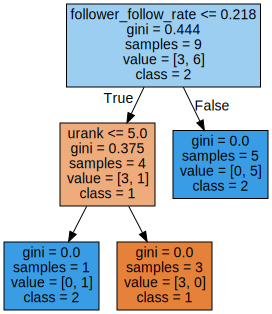

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import SVG
import pandas as pd

# Assuming 'df' is your DataFrame after loading the data

# Define the target variable 'y' and features 'X'
y = df['info_complete']
X = df.drop('info_complete', axis=1)  # This removes the target column from the feature set

# Convert categorical variables into dummy/indicator variables
X_encoded = pd.get_dummies(X)

# Train the decision tree model3
model = DecisionTreeClassifier()
model.fit(X_encoded, y)

# Specify target variable classes
class_names = [str(c) for c in model.classes_]

# Convert the trained model to graphviz format
dot_data = export_graphviz(model, out_file=None, feature_names=X_encoded.columns, class_names=class_names, filled=True)

# Plot the decision tree
graph = graphviz.Source(dot_data, format="svg")

# Display the decision tree image
SVG(graph.pipe(format='svg'))


*  **from sklearn.tree import export_graphviz:** Imports the function export_graphviz from the tree module of the sklearn library. This function is used to export the decision tree in Graphviz format.

*  **import graphviz:** Imports the graphviz library, which provides interfaces to Graphviz visualization tools.

*  **from IPython.display import SVG:** Imports the SVG class from the IPython.display module, which is used to display SVG images in Jupyter notebooks.

*  **X_encoded = pd.get_dummies(X):** Encodes categorical variables in the feature matrix X using one-hot encoding and assigns the result to X_encoded.

*  **model = DecisionTreeClassifier():** Creates an instance of the DecisionTreeClassifier class, which represents a decision tree classifier.

*  **model.fit(X_encoded, y):** Trains the decision tree model on the encoded feature matrix X_encoded and the target variable y.

*  **dot_data = export_graphviz(model, out_file=None, feature_names=X_encoded.columns, class_names=model.classes_, filled=True):** Converts the trained decision tree model into Graphviz format and stores the result in the variable dot_data. This includes information such as feature names, class names, and whether to fill the nodes with colors.

*  **graph = graphviz.Source(dot_data, format="svg"):** Creates a Source object from the Graphviz data stored in dot_data, specifying the output format as SVG.

*  **graph:** Displays the decision tree using the Graphviz visualization.

*  **SVG(graph.pipe(format='svg')):** Converts the decision tree visualization to SVG format and displays it using the SVG class.

# **Task 2**

# Test the trained model and calculate accuracy to assess the model's performance.


use the other set - the test set. use that to assess performance.

divide data into parts?

make the training set only 10-11 samples - save 3-4 of them and use to test whether there is a high accurac